Train: 1.000, Test: 0.914


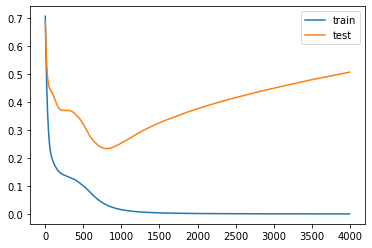

In [ ]:

# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

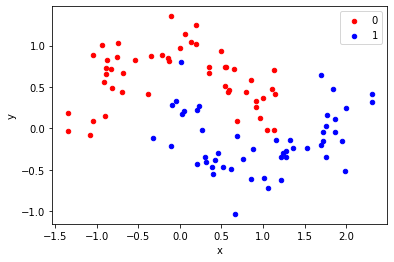

In [ ]:

# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


Epoch 00217: early stopping
Train: 0.967, Test: 0.814


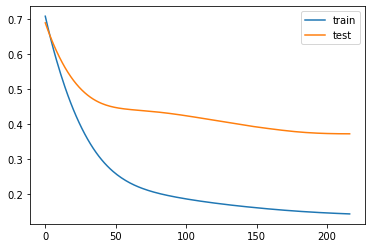

In [ ]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 01037: early stopping
Train: 1.000, Test: 0.943


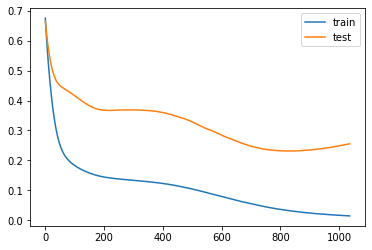

In [ ]:

# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [ ]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('/content/sample_data/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 00001: val_accuracy improved from -inf to 0.68571, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.68571 to 0.72857, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.72857

Epoch 00004: val_accuracy did not improve from 0.72857

Epoch 00005: val_accuracy did not improve from 0.72857

Epoch 00006: val_accuracy did not improve from 0.72857

Epoch 00007: val_accuracy did not improve from 0.72857

Epoch 00008: val_accuracy did not improve from 0.72857

Epoch 00009: val_accuracy did not improve from 0.72857

Epoch 00010: val_accuracy did not improve from 0.72857

Epoch 00011: val_accuracy did not improve from 0.72857

Epoch 00012: val_accuracy did not improve from 0.72857

Epoch 00013: val_accuracy did not improve from 0.72857

Epoch 00014: val_accuracy did not improve from 0.72857

Epoch 00015: val_accuracy did not improve from 0.72857

Epoch 00016: val_accuracy did not improve from 0.72857

Epoch 00017: val_accuracy did not im


Epoch 00001: val_accuracy improved from -inf to 0.67143, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.67143

Epoch 00003: val_accuracy did not improve from 0.67143

Epoch 00004: val_accuracy did not improve from 0.67143

Epoch 00005: val_accuracy improved from 0.67143 to 0.68571, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.68571 to 0.71429, saving model to best_model.h5

Epoch 00007: val_accuracy did not improve from 0.71429

Epoch 00008: val_accuracy did not improve from 0.71429

Epoch 00009: val_accuracy did not improve from 0.71429

Epoch 00010: val_accuracy did not improve from 0.71429

Epoch 00011: val_accuracy did not improve from 0.71429

Epoch 00012: val_accuracy improved from 0.71429 to 0.72857, saving model to best_model.h5

Epoch 00013: val_accuracy did not improve from 0.72857

Epoch 00014: val_accuracy did not improve from 0.72857

Epoch 00015: val_accuracy did not improve from 0.72857

Epoch 00016: val_accur

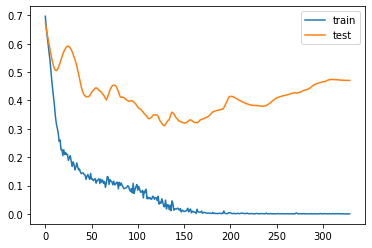

In [ ]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


Epoch 00001: val_accuracy improved from -inf to 0.45714, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.45714 to 0.51429, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.51429 to 0.55714, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.55714 to 0.60000, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.60000 to 0.61429, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.61429 to 0.65714, saving model to best_model.h5

Epoch 00007: val_accuracy improved from 0.65714 to 0.68571, saving model to best_model.h5

Epoch 00008: val_accuracy did not improve from 0.68571

Epoch 00009: val_accuracy improved from 0.68571 to 0.70000, saving model to best_model.h5

Epoch 00010: val_accuracy improved from 0.70000 to 0.71429, saving model to best_model.h5

Epoch 00011: val_accuracy did not improve from 0.71429

Epoch 00012: val_accuracy did not improve from 0.71429

Epoch 00013: va

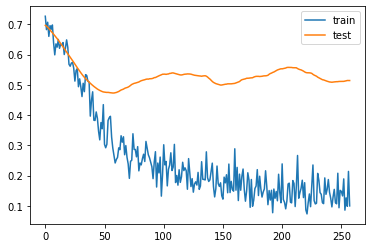

In [ ]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


Epoch 00001: val_accuracy improved from -inf to 0.68571, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.68571 to 0.71429, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.71429

Epoch 00004: val_accuracy did not improve from 0.71429

Epoch 00005: val_accuracy did not improve from 0.71429

Epoch 00006: val_accuracy did not improve from 0.71429

Epoch 00007: val_accuracy did not improve from 0.71429

Epoch 00008: val_accuracy did not improve from 0.71429

Epoch 00009: val_accuracy improved from 0.71429 to 0.72857, saving model to best_model.h5

Epoch 00010: val_accuracy did not improve from 0.72857

Epoch 00011: val_accuracy did not improve from 0.72857

Epoch 00012: val_accuracy did not improve from 0.72857

Epoch 00013: val_accuracy did not improve from 0.72857

Epoch 00014: val_accuracy improved from 0.72857 to 0.74286, saving model to best_model.h5

Epoch 00015: val_accuracy did not improve from 0.74286

Epoch 00016: val_accur

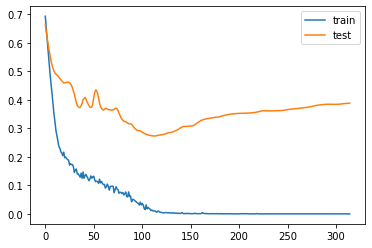

In [ ]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


Epoch 00001: val_accuracy improved from -inf to 0.48571, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.48571 to 0.55714, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.55714 to 0.64286, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.64286 to 0.65714, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.65714 to 0.67143, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.67143 to 0.68571, saving model to best_model.h5

Epoch 00007: val_accuracy improved from 0.68571 to 0.70000, saving model to best_model.h5

Epoch 00008: val_accuracy did not improve from 0.70000

Epoch 00009: val_accuracy did not improve from 0.70000

Epoch 00010: val_accuracy did not improve from 0.70000

Epoch 00011: val_accuracy did not improve from 0.70000

Epoch 00012: val_accuracy did not improve from 0.70000

Epoch 00013: val_accuracy did not improve from 0.70000

Epoch 00014: val_accuracy did

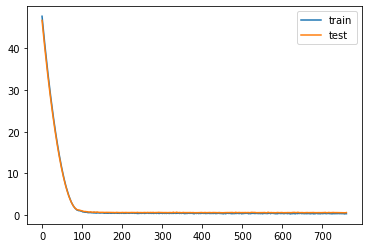

In [ ]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.4))
model.add(Dense(200, input_dim=2, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.2))
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()